<a href="https://colab.research.google.com/github/anish2105/CNN/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VGG 16**


**VERY DEEP CONVOLUTIONAL NETWORKS**

What is VGG?

VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers.

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2023-01-09 14:51:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   263MB/s    in 0.2s    

2023-01-09 14:51:06 (263 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
! unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import numpy as np

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
#Convolutional Layer

model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


#Fully Connected Layer

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0.1, patience=5, verbose=1, mode='auto')


H = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


<ipython-input-6-fa49e0b50249>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 2449.8774 - accuracy: 0.4938
Epoch 1: val_accuracy improved from -inf to 0.48438, saving model to vgg16.hdf5


10/10 [==============================] - 30s 2s/step - loss: 2449.8774 - accuracy: 0.4938 - val_loss: 0.7010 - val_accuracy: 0.4844
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.7026 - accuracy: 0.5099
Epoch 2: val_accuracy improved from 0.48438 to 0.50937, saving model to vgg16.hdf5


10/10 [==============================] - 16s 2s/step - loss: 0.7026 - accuracy: 0.5099 - val_loss: 0.6958 - val_accuracy: 0.5094
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.8212 - accuracy: 0.4868
Epoch 3: val_accuracy did not improve from 0.50937


10/10 [==============================] - 6s 583ms/step - loss: 0.8212 - accuracy: 0.4868 - val_loss: 0.6933 - val_accuracy: 0.4906
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.7008 - accuracy: 0.5063
Epoch 4: val_accuracy did not improve from 0.50937


10/10 [==============================] - 6s 607ms/step - loss: 0.7008 - accuracy: 0.5063 - val_loss: 0.6929 - val_accuracy: 0.5063
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5197
Epoch 5: val_accuracy did not improve from 0.50937


10/10 [==============================] - 6s 593ms/step - loss: 0.6923 - accuracy: 0.5197 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.4704
Epoch 6: val_accuracy did not improve from 0.50937


10/10 [==============================] - 6s 625ms/step - loss: 0.6973 - accuracy: 0.4704 - val_loss: 0.6931 - val_accuracy: 0.5094
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5219
Epoch 7: val_accuracy improved from 0.50937 to 0.51250, saving model to vgg16.hdf5


10/10 [==============================] - 13s 1s/step - loss: 0.6929 - accuracy: 0.5219 - val_loss: 0.6928 - val_accuracy: 0.5125
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5296
Epoch 8: val_accuracy did not improve from 0.51250


10/10 [==============================] - 6s 622ms/step - loss: 0.6919 - accuracy: 0.5296 - val_loss: 0.6929 - val_accuracy: 0.5125
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5031
Epoch 9: val_accuracy did not improve from 0.51250


10/10 [==============================] - 6s 621ms/step - loss: 0.6939 - accuracy: 0.5031 - val_loss: 0.6944 - val_accuracy: 0.4906
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.4844
Epoch 10: val_accuracy did not improve from 0.51250


10/10 [==============================] - 6s 629ms/step - loss: 0.6950 - accuracy: 0.4844 - val_loss: 0.6933 - val_accuracy: 0.4938


1/1 [==============================] - 1s 850ms/step
dog


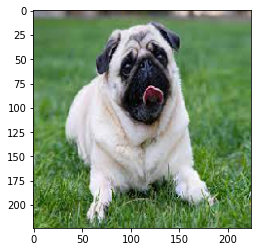

In [9]:
import matplotlib.pyplot as plt


from keras.preprocessing import image
import keras.utils as image
img = image.load_img("dog.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16.hdf5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("dog")
else:
    print('cat')

In [10]:
output

array([[0.5116877 , 0.48831227]], dtype=float32)